# Project Proposal
### Group 19: Aidan Gallant, Alex Hachey, Cailey Murad, Caroline Ruus

## [Title]

## Introduction
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question

## Preliminary Exploratory Data Analysis
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). (An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data.)
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). (An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.)

In [31]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
options(repr.matrix.max.rows = 6)

In [37]:
#read data, in tidy format, make into data frame
temp <- tempfile()
temp2 <- tempfile()

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
download.file(url, temp)

unzip(zipfile = temp, exdir = temp2)

student <- read_excel(file.path(temp2, "student-mat"))
unlink(c(temp, temp2))
student


ERROR: Error in read_excel(file.path(temp2, "student-mat")): could not find function "read_excel"


In [49]:
student <- read_delim("data/student-mat.csv", delim = ";")
student <- student %>%
    as_tibble() %>%
    select (studytime, absences, G1, G2, G3)
student


Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



studytime,absences,G1,G2,G3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,6,5,6,6
2,4,5,5,6
2,10,7,8,10
⋮,⋮,⋮,⋮,⋮
1,3,10,8,7
1,0,11,12,10
1,5,8,9,9


In [52]:
# split data into testing and training data

set.seed(3456)
student_split <- initial_split(student, prop = 0.75, strata = studytime)  
student_train <- training(student_split)
student_test <- testing(student_split)

student_train

studytime,absences,G1,G2,G3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,6,5,6,6
2,4,5,5,6
2,10,7,8,10
⋮,⋮,⋮,⋮,⋮
1,3,14,16,16
1,3,10,8,7
1,0,11,12,10


In [48]:
#summarize the data in at least one table

summary(student_training)

   studytime        absences            G1              G2       
 Min.   :1.000   Min.   : 0.000   Min.   : 3.00   Min.   : 0.00  
 1st Qu.:1.000   1st Qu.: 0.000   1st Qu.: 8.00   1st Qu.: 8.00  
 Median :2.000   Median : 4.000   Median :10.00   Median :11.00  
 Mean   :2.037   Mean   : 6.027   Mean   :10.82   Mean   :10.65  
 3rd Qu.:2.000   3rd Qu.: 8.000   3rd Qu.:13.00   3rd Qu.:13.00  
 Max.   :4.000   Max.   :75.000   Max.   :19.00   Max.   :19.00  
       G3       
 Min.   : 0.00  
 1st Qu.: 8.00  
 Median :11.00  
 Mean   :10.36  
 3rd Qu.:14.00  
 Max.   :20.00  

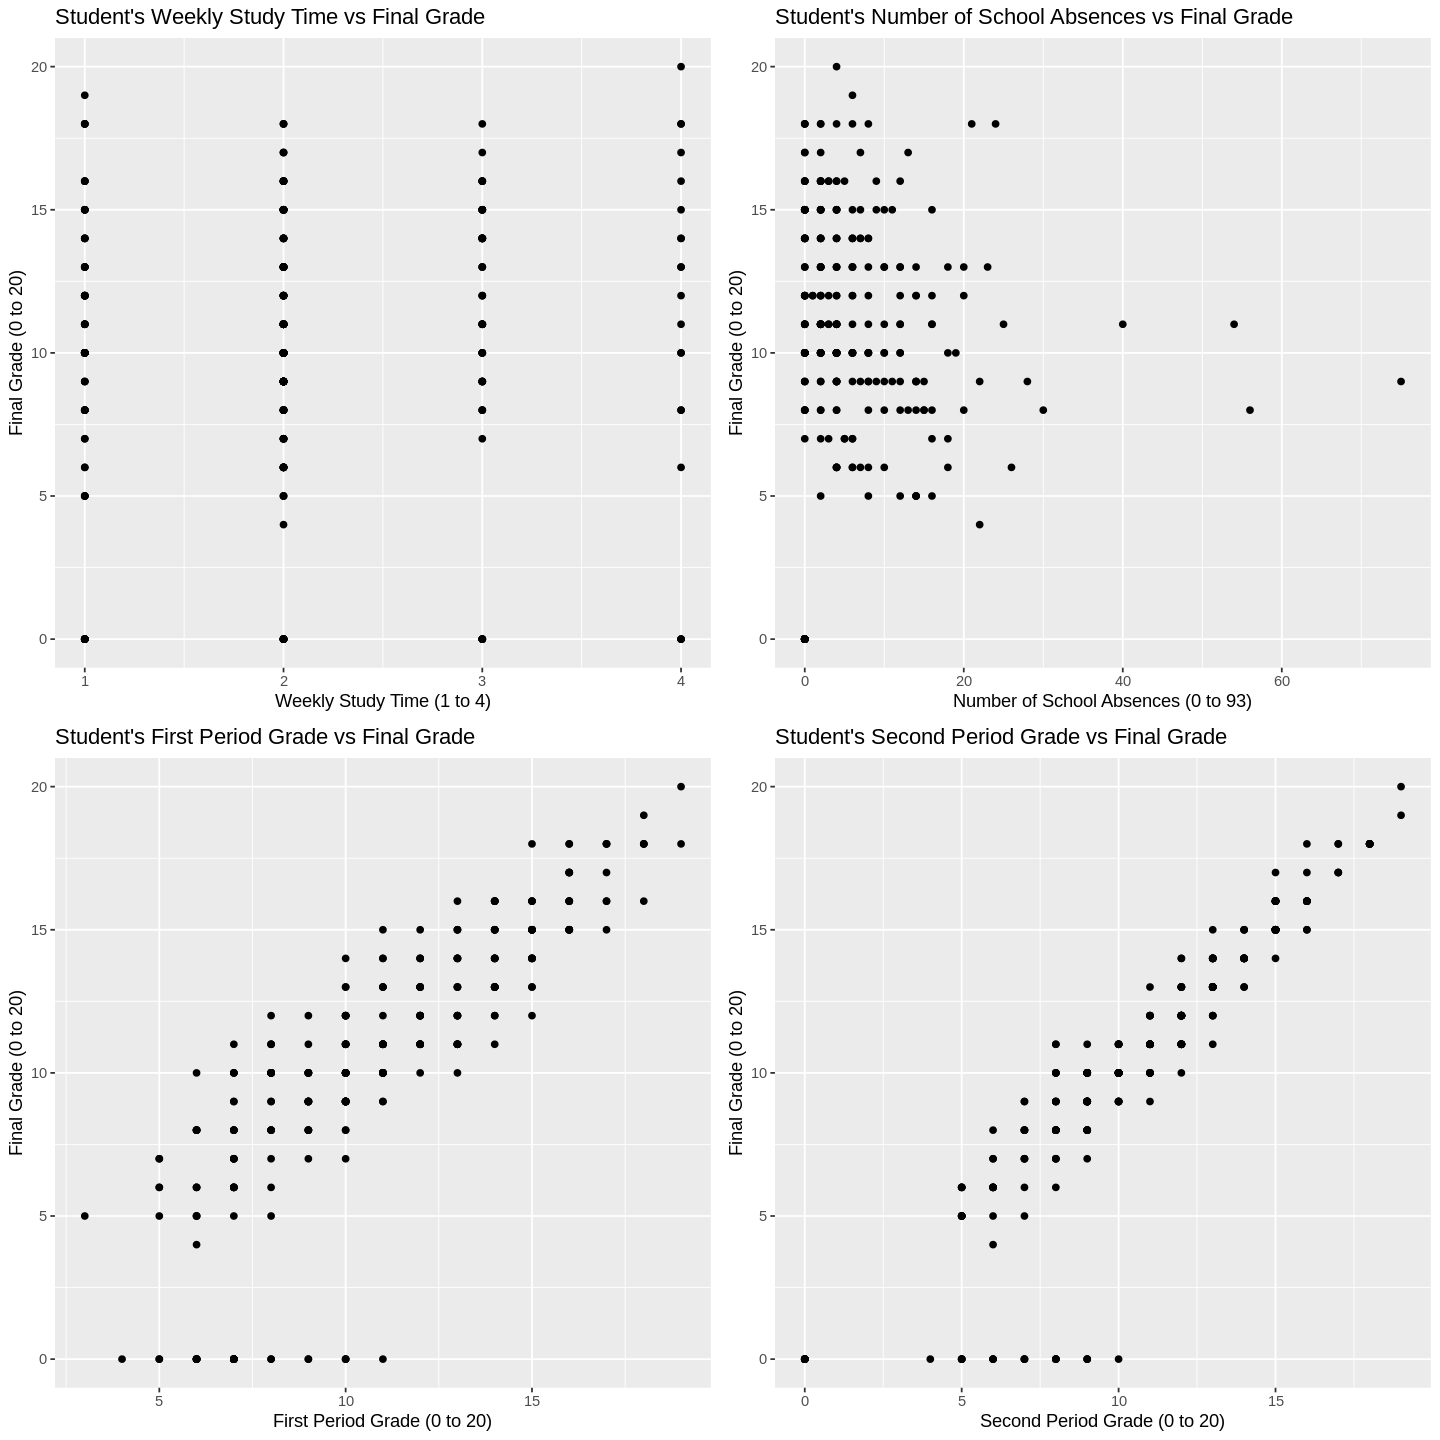

In [47]:
# plot the data

options(repr.plot.width = 12, repr.plot.height = 12)
studytime_plot <- student_training %>%
    ggplot(aes(x = studytime, y = G3)) +
    geom_point() +
    labs(x = "Weekly Study Time (1 to 4)", y = "Final Grade (0 to 20)") +
    ggtitle ("Student's Weekly Study Time vs Final Grade")
absences_plot <- student_training %>%
    ggplot(aes(x = absences, y = G3)) +
    geom_point() +
    labs(x = "Number of School Absences (0 to 93)", y = "Final Grade (0 to 20)") +
    ggtitle ("Student's Number of School Absences vs Final Grade")
G1_plot <- student_training %>%
    ggplot(aes(x = G1, y = G3)) +
    geom_point() +
    labs(x = "First Period Grade (0 to 20)", y = "Final Grade (0 to 20)") +
    ggtitle ("Student's First Period Grade vs Final Grade")
G2_plot <- student_training %>%
    ggplot(aes(x = G2, y = G3)) +
    geom_point() +
    labs(x = "Second Period Grade (0 to 20)", y = "Final Grade (0 to 20)") +
    ggtitle ("Student's Second Period Grade vs Final Grade")

library(cowplot)
plot_grid(studytime_plot, absences_plot, G1_plot, G2_plot, ncol = 2)

## Methods
- Explain how you will conduct either your data analysis and which variables/columns you will use.
  (Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good    idea. For each variable think: is this a useful variable for prediction?)
- Describe at least one way that you will visualize the results


## Expected Outcomes and Significance
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?


### Notes:
- predict G3 using G1, G2, studytime, absences